In [1]:
import os
import random
import numpy as np
from PIL import Image, ImageDraw
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def img_show(arr):
    plt.figure(figsize=(20,10))
    plt.imshow(arr)
    plt.show("off")

In [3]:
peth_in = '../data/input'

In [4]:
with open('../scr/class_names.pickle', 'rb') as f:
    class_names = pickle.load(f)
class_names

['Аня', 'Бобер', 'Женька', 'Ира', 'Юра']

In [5]:
imgs_path = []
for fold in os.listdir(peth_in):
    if fold != 'test': continue
    for fin_maim in os.listdir(peth_in + '/' + fold):
        imgs_path.append(peth_in + '/' + fold + '/' + fin_maim)
imgs_path

['../data/input/test/1389768534_007.jpg',
 '../data/input/test/1389768518_030.jpg',
 '../data/input/test/1389768528_033.jpg',
 '../data/input/test/1389768509_014.jpg',
 '../data/input/test/apwHbNyt15o.jpg',
 '../data/input/test/Hawxn7Fq6a0.jpg']

In [29]:
def prdict_class(model, img):
    tensor = tf.image.resize([np.array(img)], [256, 256])
    predict_data = model.predict(tensor)
    print('Бобровость ' + str(round(predict_data[0][1] * 100, 1)) + '%')
    return class_names[np.argmax(predict_data)]

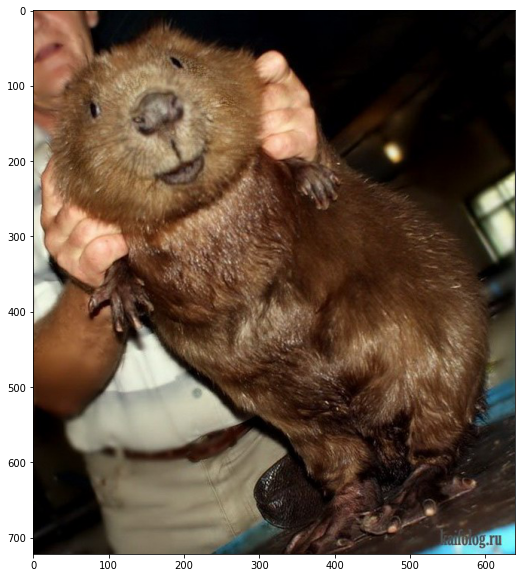

Бобровость 227.8%
Бобер


In [30]:
img = Image.open(random.choice(imgs_path))
img_show(img)
model = tf.keras.models.load_model('../scr/model')
print(prdict_class(model, img))